# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X + \epsilon))^2 = \mathbb{E}(X(a - 1) + \epsilon)^2  = \mathbb{E}(X^2(a - 1)^2 + 2X(a - 1)\epsilon + \epsilon^2) = (a-1)^2\mathbb{E}(X^2) + 2(a-1)\mathbb{E}(X)\mathbb{E}(\epsilon) + \mathbb{E}(\epsilon^2) = (a-1)^2 + \sigma^2$,

Find the argument that minimises the population risk.

$$a^* = min (a-1)^2 + \sigma^2$$

$$2a^* -2 =0$$

$$a^* = 1$$

How the minimum value changes with $\sigma^2$?

It doesn't depend on $\sigma^2$.

In our task we know $a^* = 1$.

In [81]:
def population_risk(a, sigma_eps):
     return (a-1)**2 + sigma_eps**2

### b)

In [82]:
# sampling
import numpy as np

X = np.random.normal(0, 1, 50)
eps = np.random.normal(0, 1, 50)

Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [83]:
def empirical_risk(a, x, y):
     return np.mean((a*x - y) ** 2) 

### c)

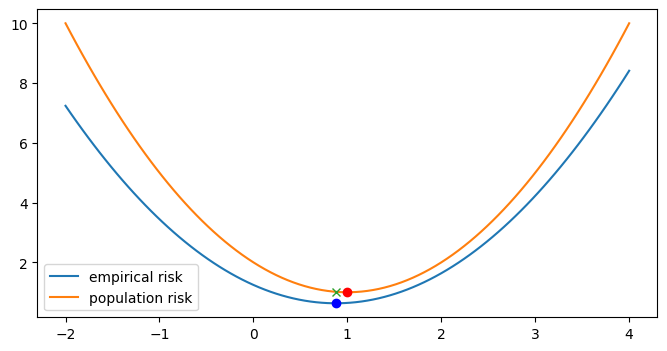

In [84]:
# code, plot
import matplotlib.pyplot as plt
import scipy.optimize as opt

aa = np.linspace(-2, 4, 100)

plt.figure(figsize=(8, 4))
plt.plot(aa, [empirical_risk(a, X, Y) for a in aa], label='empirical risk')
plt.plot(aa, [population_risk(a, 1) for a in aa], label='population risk')

emp_min = opt.minimize(lambda a: empirical_risk(a, X, Y), 0)
pop_min = opt.minimize(lambda a: population_risk(a, 1), 0)

plt.plot(emp_min.x, emp_min.fun, 'bo')
plt.plot(pop_min.x, pop_min.fun, 'ro')
plt.plot(emp_min.x, population_risk(emp_min.x, 1), 'x')

plt.legend()

plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [85]:
# excess risk
excess_risk = population_risk(emp_min.x, 1)[0] - 1
excess_risk

0.01501184739684902

In [86]:
# simulations with fixed sample size
def excess_risk(n, L):
    excess_risks = []
    for i in range(L):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0, 1, n)
        Y = X + eps

        emp_min = opt.minimize(lambda a: empirical_risk(a, X, Y), 0)
        excess_risks.append(population_risk(emp_min.x, 1)[0] - 1)

    return np.mean(excess_risks)

excess_risk(50, 200)

0.018328218419937117

In [87]:
# simulations for various sample sizes
ns = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
L = 200

risks = [excess_risk(n, L) for n in ns]

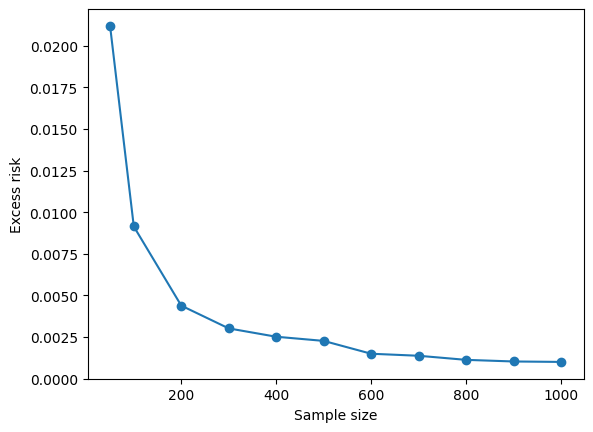

In [88]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(ns, risks, 'o-')
plt.xlabel('Sample size')
plt.ylabel('Excess risk')
plt.show()